<a href="https://colab.research.google.com/github/Jubelo11/CN6000/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Data Head ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int6

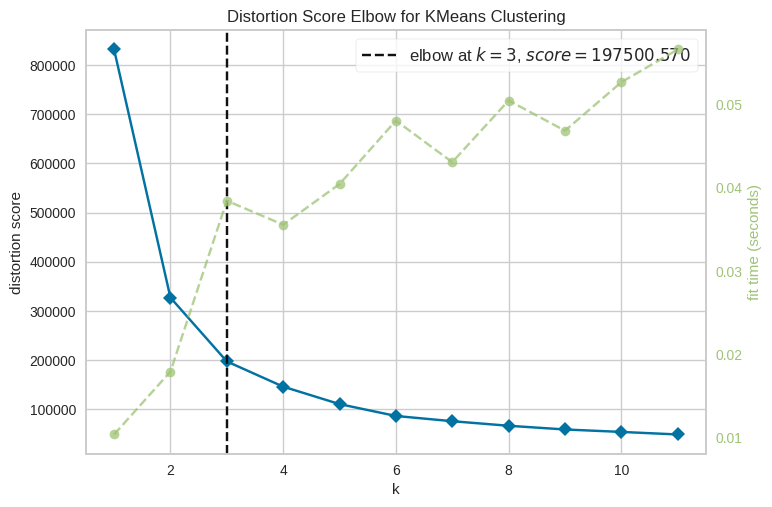

--- K-Means run with k=3 ---
Cluster labels assigned.


--- DataFrame with Cluster Labels ---
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168      

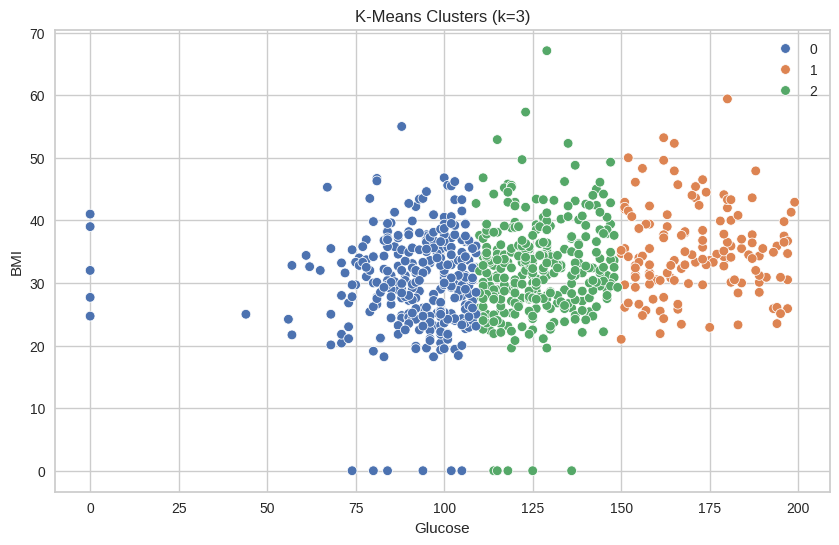

--- Cluster Visualization with Centroids ---


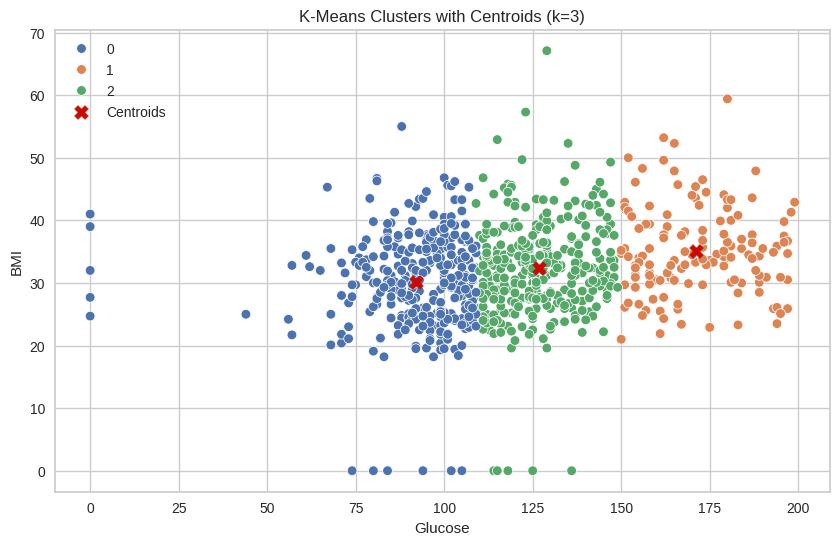

--- Predicting on New Data Points ---
New data points (4):
   Glucose   BMI
0       90  22.0
1      180  35.0
2      120  28.5
3      100  40.0
Predicted cluster labels:
[0 1 2 0]


In [8]:
# ---  Import everything ---
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from google.colab import files # Import files module for uploading




file_path = 'diabetesN.csv'

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}. Please upload the file.")
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

    if file_path in uploaded:
      df = pd.read_csv(file_path)
    else:
      uploaded_filename = list(uploaded.keys())[0]
      print(f"Using uploaded file: {uploaded_filename}")
      df = pd.read_csv(uploaded_filename)


print("--- Data Head ---")
print(df.head())
print("\n")

print("--- Data Info ---")
df.info()
print("\n")


# --- Step 3: Select Features for Clustering ---
# We will cluster based on 'Glucose' (column 1) and 'BMI' (column 5)
xx = df.iloc[:,[1,5]]
print("--- Selected Features (xx) Head ---")
print(xx.head())
print("\n")


# --- Step 4: Find Optimal Number of Clusters (Elbow Method) ---
print("--- Finding Optimal k with Elbow Method ---")
model = KMeans(random_state=0, init='k-means++', n_init=10) # Added n_init explicitly
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(xx)
visualizer.show()


# --- Step 5: Apply K-Means Clustering ---
# Based on elbow plot, k=3 seems like a good choice
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=0, n_init=10) # Added n_init explicitly
kmeans.fit(xx)

print(f"--- K-Means run with k={k_optimal} ---")
print("Cluster labels assigned.")
print("\n")


# --- Step 6: Analyze Results ---
# Add the cluster labels back to the original dataframe
df["Clus_km"] = kmeans.labels_
print("--- DataFrame with Cluster Labels ---")
print(df.head(15))
print("\n")

# Show cluster centers
print("--- Cluster Centers (Centroids) ---")
print(kmeans.cluster_centers_)
print("\n")

# Show size of each cluster
print("--- Cluster Sizes ---")
print(Counter(kmeans.labels_))
print("\n")

# show the Silhouette Score
clusters = kmeans.labels_.tolist()
cluster_validation_score = metrics.silhouette_score(xx, clusters, metric='euclidean')
print("--- Silhouette Score ---")
print(f"Score for k={k_optimal}: {cluster_validation_score}")
print("\n")


# --- Step 7: Visualize  Clusters ---
print("--- Cluster Visualization (Glucose vs. BMI) ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=xx, x="Glucose", y="BMI", hue=kmeans.labels_, palette="deep")
plt.title("K-Means Clusters (k=3)")
plt.show()

print("--- Cluster Visualization with Centroids ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=xx, x="Glucose", y="BMI", hue=kmeans.labels_, palette="deep")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=100, label="Centroids")
plt.title("K-Means Clusters with Centroids (k=3)")
plt.legend()
plt.show()


# --- Step 8: Predict on New Data ---
print("--- Predicting on New Data Points ---")
newdata = [[90, 22.0], [180, 35.0], [120, 28.5], [100, 40.0]]
d = pd.DataFrame(newdata, columns=['Glucose','BMI'])

predictedClusters = kmeans.predict(d)

print(f"New data points ({len(predictedClusters)}):")
print(d)
print("Predicted cluster labels:")
print(predictedClusters)